In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('TG_STAID002759.txt', skiprows=19)

In [3]:
df.head()

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [4]:
df.columns= ['id','date','temp','quality']

In [5]:
df.head()

,id,date,temp,quality
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [6]:
df['id'].nunique()

1

In [7]:
df['id'].value_counts()

111448    25568
Name: id, dtype: int64

In [8]:
df.drop(['id'],axis=1, inplace=True)

In [9]:
df.head()

,date,temp,quality
0,19510101,-40,0
1,19510102,-14,0
2,19510103,-12,0
3,19510104,4,0
4,19510105,25,0


In [10]:
df['quality'].value_counts()

0    25568
Name: quality, dtype: int64

In [11]:
df.drop(['quality'],axis=1, inplace=True)

In [12]:
df.head()

,date,temp
0,19510101,-40
1,19510102,-14
2,19510103,-12
3,19510104,4
4,19510105,25


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    25568 non-null  int64
 1   temp    25568 non-null  int64
dtypes: int64(2)
memory usage: 399.6 KB


In [14]:
df['date']=df['date'].astype(str)

In [15]:
df['date']=pd.to_datetime(df['date'])

In [16]:
df.head()

,date,temp
0,1951-01-01,-40
1,1951-01-02,-14
2,1951-01-03,-12
3,1951-01-04,4
4,1951-01-05,25


In [17]:
df=df.set_index('date')

In [18]:
df.head()

,temp
date,
1951-01-01,-40
1951-01-02,-14
1951-01-03,-12
1951-01-04,4
1951-01-05,25


In [19]:
#subset
df_80_82 =df.loc['1980':'1982']

In [20]:
df_80_82.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [21]:
df['temp']=df['temp']*0.1

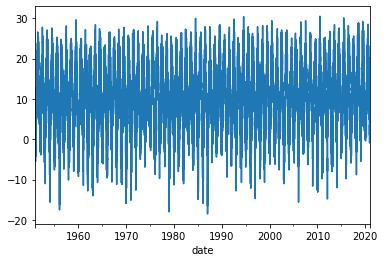

In [22]:
df['temp'].plot()

In [23]:
df_80_82['temp']=df_80_82['temp']*0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


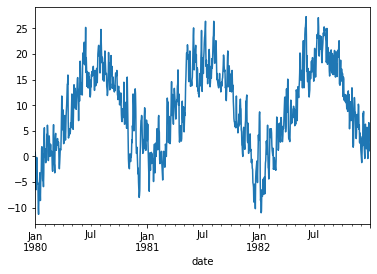

In [24]:
df_80_82['temp'].plot()

In [25]:
df_80_82.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [26]:
df_train=df.loc['1979':'2019']

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14975 entries, 1979-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    14975 non-null  float64
dtypes: float64(1)
memory usage: 234.0 KB


In [28]:
df_train.to_csv('temp_train.csv')

In [29]:
df_test=df.loc['2020']

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [31]:
df_test.to_csv('temp_test.csv')

In [32]:
df_80_82_increase_2=pd.DataFrame(df_80_82['temp']+2)

In [33]:
df_80_82_increase_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [34]:
df_80_82_increase_2.head()

,temp
date,
1980-01-01,2.8
1980-01-02,1.5
1980-01-03,-1.5
1980-01-04,-4.5
1980-01-05,-0.3


In [35]:
df_80_82.head()

,temp
date,
1980-01-01,0.8
1980-01-02,-0.5
1980-01-03,-3.5
1980-01-04,-6.5
1980-01-05,-2.3


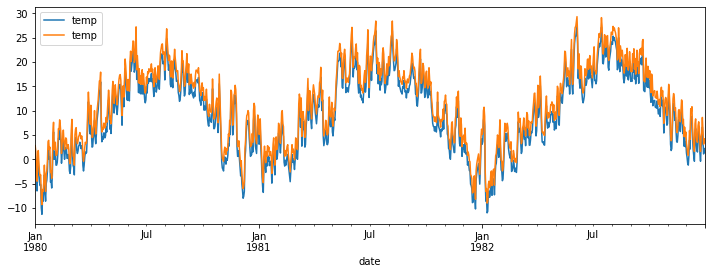

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))
df_80_82.plot(ax=ax)
df_80_82_increase_2.plot(ax=ax)


In [37]:
df_75=df['1975']
df_80=df['1980']
df_85=df['1985']
df_90=df['1990']
df_95=df['1995']
df_2000=df['2000']
df_2005=df['2005']
df_2010=df['2010']
df_2015=df['2015']

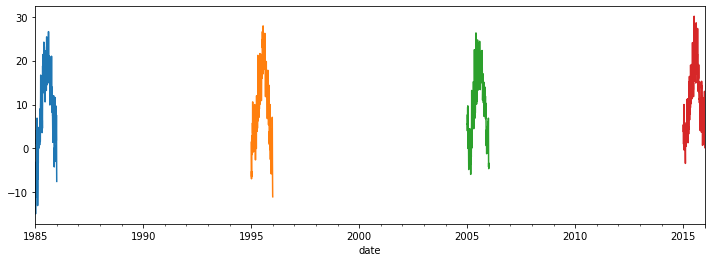

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
df_85['temp'].plot(ax=ax)
df_95['temp'].plot(ax=ax)
df_2005['temp'].plot(ax=ax)
df_2015['temp'].plot(ax=ax)

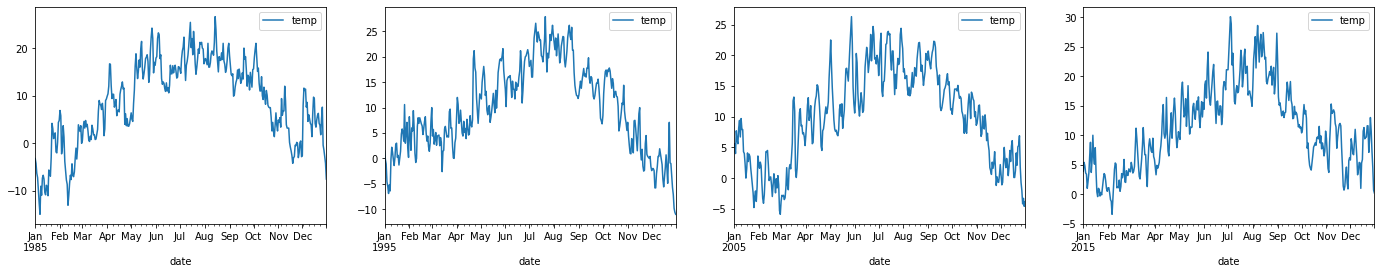

In [39]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1 , ncols=4, figsize=(24,4))
df_85.plot(ax=ax0)
df_95.plot(ax=ax1)
df_2005.plot(ax=ax2)
df_2015.plot(ax=ax3)

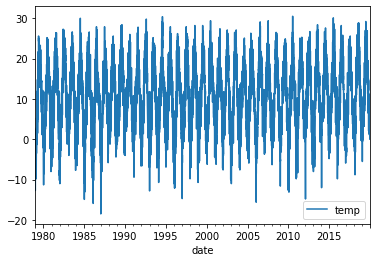

In [40]:
df_train.plot()

In [41]:
df_train['timestep'] = list(range(len(df_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_train.head()

,temp,timestep
date,,
1979-01-01,-11.9,0
1979-01-02,-9.3,1
1979-01-03,-7.8,2
1979-01-04,-9.6,3
1979-01-05,-9.9,4


In [43]:
X=df_train[['timestep']]
y=df_train[['temp']]

In [44]:
X

,timestep
date,
1979-01-01,0
1979-01-02,1
1979-01-03,2
1979-01-04,3
1979-01-05,4
...,...
2019-12-27,14970
2019-12-28,14971
2019-12-29,14972


In [45]:
model = LinearRegression()
reg=model.fit(X,y)

In [46]:
reg.score(X, y)

0.005452814262220662

In [47]:
print('coefficient is: ',reg.coef_)
print('intercept is: ',reg.intercept_)

coefficient is:  [[0.00013491]]
intercept is:  [9.11914954]


In [48]:
# add the predicted linear trend to the dataframe
df_train['trend'] = reg.predict(X)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,temp,timestep,trend
date,,,
1979-01-01,-11.9,0,9.119150
1979-01-02,-9.3,1,9.119284
1979-01-03,-7.8,2,9.119419
1979-01-04,-9.6,3,9.119554
1979-01-05,-9.9,4,9.119689


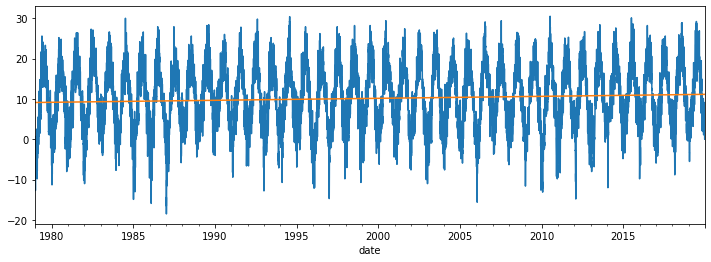

In [49]:
# Bsseline model prediction (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)
df_train['trend'].plot(ax=ax)

**Trend from linear reg model**

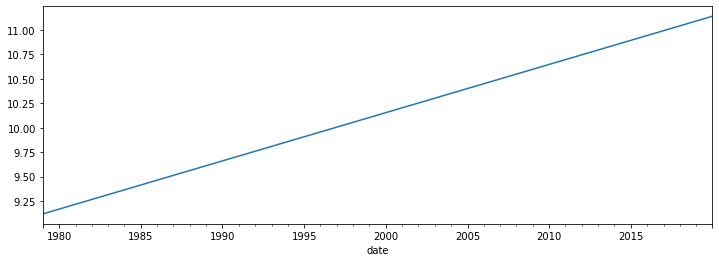

In [50]:
# Trend 
fig, ax = plt.subplots(figsize=(12, 4))
df_train['trend'].plot(ax=ax)

**Modeling the seasonality**

In [51]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_train.index)
# sklearn.preprocessing.OneHotEncoder

df_train = df_train.join(seasonal_dummies)
df_train.head()

,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df_train.head()

,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# new model data prepration
#X = df_train.drop(columns=['temp', 'trend'])
X = df_train.drop(columns=['temp','trend'])
X.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
1979-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1979-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1979-01-03,2,0,0,0,0,0,0,0,0,0,0,0
1979-01-04,3,0,0,0,0,0,0,0,0,0,0,0
1979-01-05,4,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df_train.head()

,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0


In [55]:
#new linear reg model including seasonality
reg.fit(X,y)

LinearRegression()

In [56]:
df_train['trend_seasonal'] = reg.predict(X)
df_train.head()

,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
date,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0,-0.228877
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0,-0.228750
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0,-0.228624
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0,-0.228497
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0,-0.228371


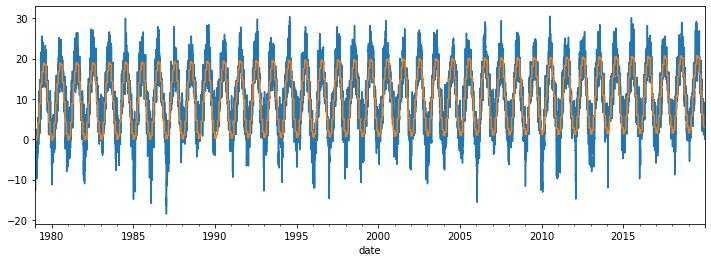

In [57]:
# Bsseline model prediction updated seasonality included (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)
df_train['trend_seasonal'].plot(ax=ax)

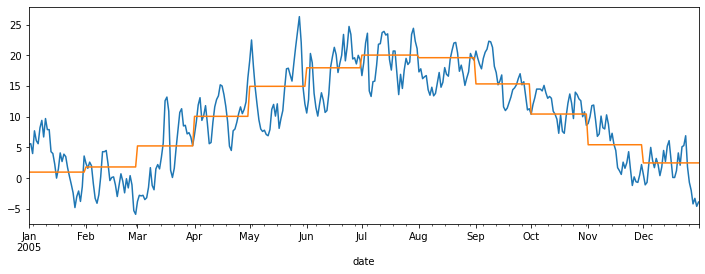

In [58]:
# Zoom in to year 2005
# Bsseline model prediction updated seasonality included (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].loc['2005'].plot(ax=ax)
df_train['trend_seasonal'].loc['2005'].plot(ax=ax)

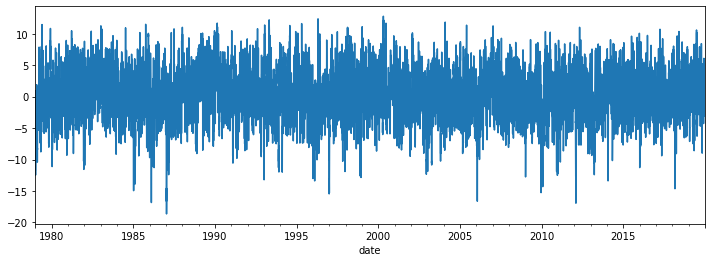

In [59]:
# remainder for all data
df_train['remainder'] = df_train['temp'] - df_train['trend_seasonal']
fig, ax = plt.subplots(figsize=(12, 4))
df_train['remainder'].plot(ax=ax)

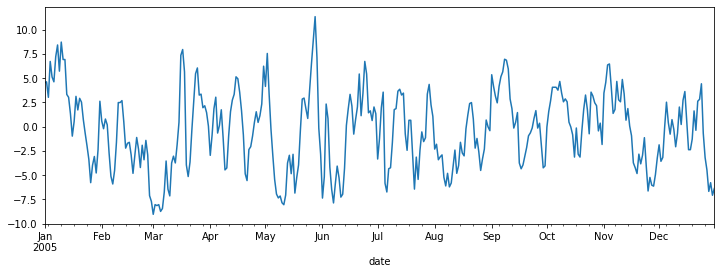

In [60]:
# Zoom in to year 2005
fig, ax = plt.subplots(figsize=(12, 4))
df_train['remainder'].loc['2005'].plot(ax=ax)

In [61]:
df_train['remainder'].to_csv('basline_with_seasonality_remainder.csv')

**Polynomials**

---



In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
trans = PolynomialFeatures(degree=5)
df_train_poly = pd.DataFrame(trans.fit_transform(df_train[['timestep']])).set_index(df_train.index)

In [70]:
df_train_poly.head()

,0,1,2,3,4,5
date,,,,,,
1979-01-01,1.0,0.0,0.0,0.0,0.0,0.0
1979-01-02,1.0,1.0,1.0,1.0,1.0,1.0
1979-01-03,1.0,2.0,4.0,8.0,16.0,32.0
1979-01-04,1.0,3.0,9.0,27.0,81.0,243.0
1979-01-05,1.0,4.0,16.0,64.0,256.0,1024.0


In [65]:
df_train_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14975 non-null  float64
 1   1       14975 non-null  float64
 2   2       14975 non-null  float64
 3   3       14975 non-null  float64
 4   4       14975 non-null  float64
 5   5       14975 non-null  float64
dtypes: float64(6)
memory usage: 702.1 KB


In [71]:
df_train= df_train.join(df_train_poly)
df_train.head()

,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,0,1,2,3,4,5
date,,,,,,,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0,-0.228877,-11.671123,1.0,0.0,0.0,0.0,0.0,0.0
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0,-0.228750,-9.071250,1.0,1.0,1.0,1.0,1.0,1.0
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0,-0.228624,-7.571376,1.0,2.0,4.0,8.0,16.0,32.0
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0,-0.228497,-9.371503,1.0,3.0,9.0,27.0,81.0,243.0
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0,-0.228371,-9.671629,1.0,4.0,16.0,64.0,256.0,1024.0


In [73]:
# preprocess data or new model fiting
X = df_train.drop(columns=['temp','trend','trend_seasonal','remainder',0,1])
X.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,2,3,4,5
date,,,,,,,,,,,,,,,,
1979-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1979-01-02,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0
1979-01-03,2,0,0,0,0,0,0,0,0,0,0,0,4.0,8.0,16.0,32.0
1979-01-04,3,0,0,0,0,0,0,0,0,0,0,0,9.0,27.0,81.0,243.0
1979-01-05,4,0,0,0,0,0,0,0,0,0,0,0,16.0,64.0,256.0,1024.0


In [74]:
#new linear reg model including seasonality and Polynomials
reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [75]:
df_train['predictions'] = reg.predict(X)
df_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,temp,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,0,1,2,3,4,5,predictions
date,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,0,0,0,0,0,0,0,-0.228877,-11.671123,1.0,0.0,0.0,0.0,0.0,0.0,9.085606
1979-01-02,-9.3,1,9.119284,0,0,0,0,0,0,0,0,0,0,0,-0.228750,-9.071250,1.0,1.0,1.0,1.0,1.0,1.0,9.085606
1979-01-03,-7.8,2,9.119419,0,0,0,0,0,0,0,0,0,0,0,-0.228624,-7.571376,1.0,2.0,4.0,8.0,16.0,32.0,9.085606
1979-01-04,-9.6,3,9.119554,0,0,0,0,0,0,0,0,0,0,0,-0.228497,-9.371503,1.0,3.0,9.0,27.0,81.0,243.0,9.085607
1979-01-05,-9.9,4,9.119689,0,0,0,0,0,0,0,0,0,0,0,-0.228371,-9.671629,1.0,4.0,16.0,64.0,256.0,1024.0,9.085608


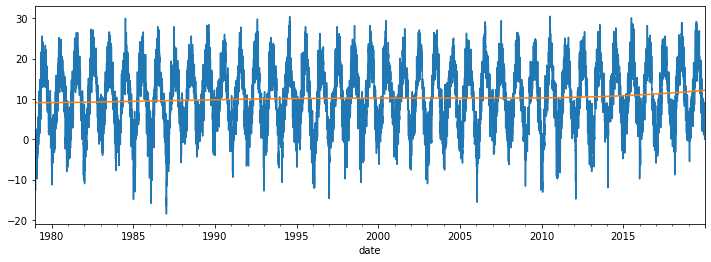

In [76]:
# Bsseline model prediction updated with seasonality and polynomials(the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)
df_train['predictions'].plot(ax=ax)


**New library**
---



In [137]:
df_train=pd.read_csv('temp_train.csv')
df_train.head()

,date,temp
0,1979-01-01,-11.9
1,1979-01-02,-9.3
2,1979-01-03,-7.8
3,1979-01-04,-9.6
4,1979-01-05,-9.9


In [138]:
df_train['date']=df_train['date'].astype(str)
df_train['date']=pd.to_datetime(df_train['date'])
df_train=df_train.set_index('date')
df_train['timestep'] = list(range(len(df_train)))
df_train['temp'] = df_train['temp']+273 #Kelvin
df_train.head()

,temp,timestep
date,,
1979-01-01,261.1,0
1979-01-02,263.7,1
1979-01-03,265.2,2
1979-01-04,263.4,3
1979-01-05,263.1,4


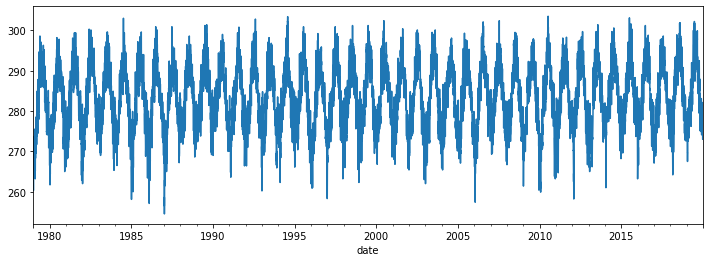

In [139]:
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14975 entries, 1979-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp      14975 non-null  float64
 1   timestep  14975 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 351.0 KB


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25568 entries, 1951-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    25568 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(df_train['temp'].loc['2005':'2008'], model='additive')

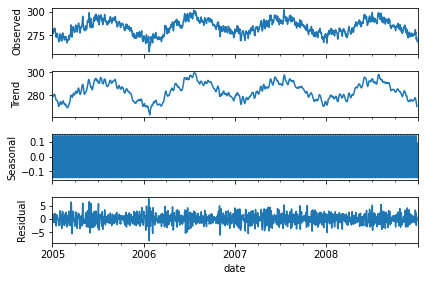

In [150]:
sd.plot()
None

In [123]:
df.head()

,temp
date,
1951-01-01,-4.0
1951-01-02,-1.4
1951-01-03,-1.2
1951-01-04,0.4
1951-01-05,2.5
